#Statement of Purpose

This notebook will analyze a dataset which contains sales data for video games between the years 1980-2016.  The dataset divides sales by region, containing: **EU Sales** for Europe, **JP Sales** for Japan, **NA Sales** for North America, and **Global Sales** for global sales.  The games are also categorized by genre.  I intend to compare North American sales to both Europe and Japan, and see if different genres have statistically different sales. I will only use sales from 2011 on to make the findings more relevant to our current market. 

In [1]:
#First I will import the necessary libraries for my notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [2]:
#Next I will import my data frame
df_vgsales = pd.read_csv('https://raw.githubusercontent.com/fhebal/analysis-data/main/vgsales.csv')
df_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...,...
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


In [3]:
#Let's see what we're working with. I see some nulls under 'Publisher' but that won't be a problem for us. The sales are represented in millions.

df_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Just for funsies lets see what sales looked like over the 30 some years available in this dataset. Looks like sales grew steadily until '08 where they peaked and have been falling steadily since. 

Text(0.5, 1.0, 'Sales Over All Years')

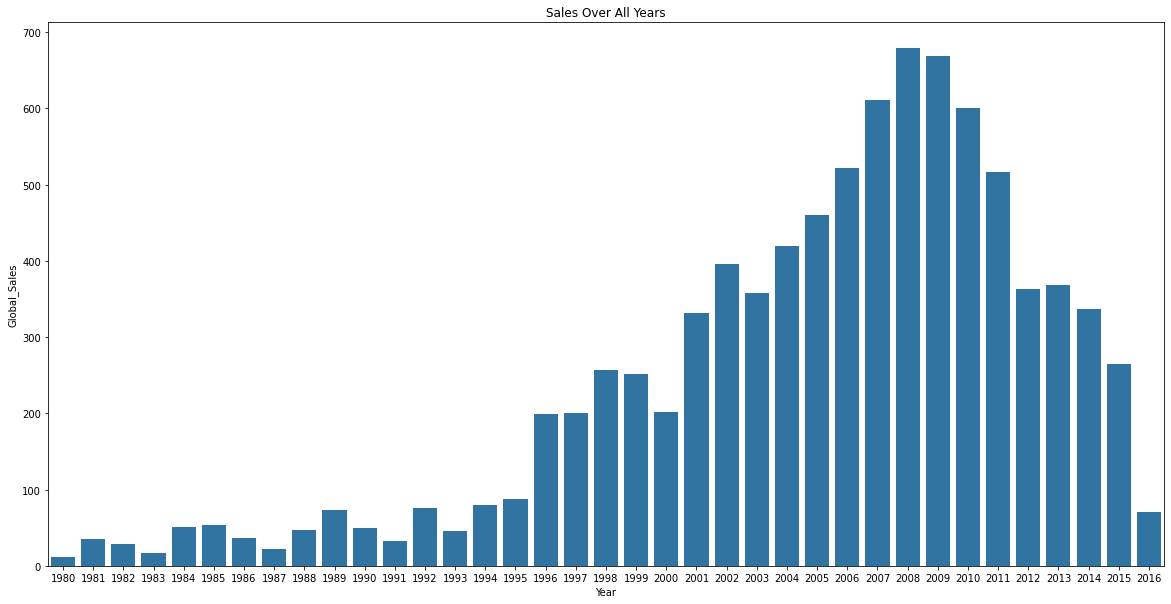

In [4]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Global_Sales', data=df_vgsales, estimator=sum, color='tab:blue', ci=None).set_title('Sales Over All Years')

In [5]:
#Okay, down to business. I am cleaning up the table to only include the last five years. 
#I'm also exluding 0's to exclude games that weren't sold in every region.

vgsales_2011_up = df_vgsales[(df_vgsales['Year']>=2011) & (df_vgsales['NA_Sales']!=0) & (df_vgsales['EU_Sales']!=0) & (df_vgsales['JP_Sales']!=0) & (df_vgsales['Global_Sales']!=0)]

vgsales_2011_up

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12442,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
12443,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
12444,43,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
12445,54,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
12447,76,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
...,...,...,...,...,...,...,...,...,...,...,...
16111,11012,Disney Art Academy,3DS,2016,Action,Nintendo,0.01,0.01,0.07,0.00,0.09
16120,11583,Assassin's Creed Chronicles,PS4,2016,Action,Ubisoft,0.01,0.05,0.01,0.01,0.08
16128,12014,Guilty Gear Xrd -Revelator-,PS3,2016,Fighting,PQube,0.01,0.02,0.02,0.01,0.07
16136,12490,Odin Sphere: Leifthrasir,PS3,2016,Role-Playing,Nippon Ichi Software,0.01,0.02,0.03,0.01,0.06


Text(0.5, 1.0, 'Global Sales in $Millions')

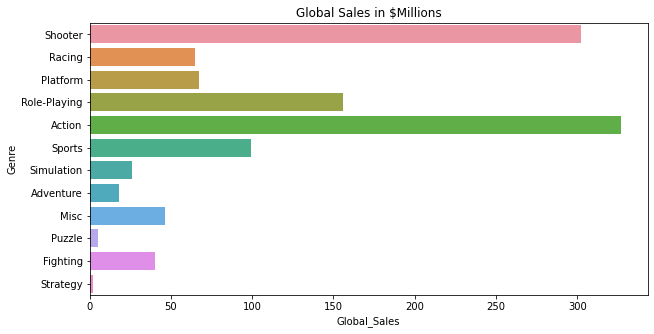

In [6]:
# Let's see what the most poplular genres are and we'll concentrate on those for our statistical tests.
plt.figure(figsize=(10,5))
sns.barplot(x='Global_Sales', y='Genre', data=vgsales_2011_up, estimator=sum, ci=None).set_title('Global Sales in $Millions')

Now let's break it down by region

##North American Sales

Text(0.5, 1.0, 'NA Sales in $Millions')

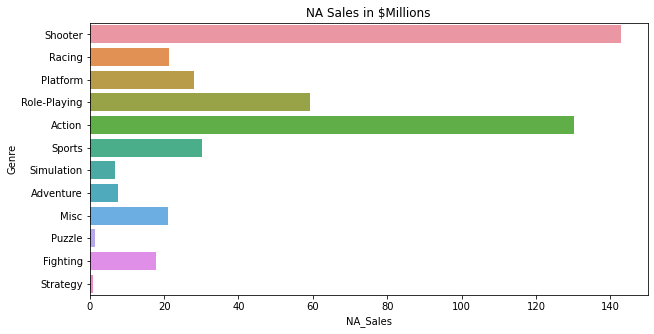

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x='NA_Sales', y='Genre', data=vgsales_2011_up, estimator=sum, ci=None).set_title('NA Sales in $Millions')

##Europe Sales

Text(0.5, 1.0, 'EU Sales in $Millions')

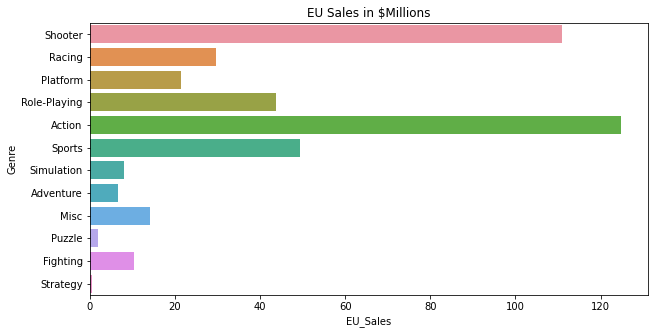

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='EU_Sales', y='Genre', data=vgsales_2011_up, estimator=sum, ci=None).set_title('EU Sales in $Millions')

##Japan Sales

Text(0.5, 1.0, 'JP Sales in $Millions')

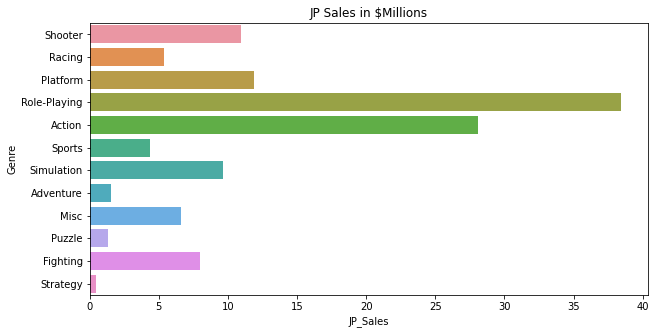

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='JP_Sales', y='Genre', data=vgsales_2011_up, estimator=sum, ci=None).set_title('JP Sales in $Millions')

Okay, looks like our top three are 'Action', 'Shooter', and 'Role-Playing', in that order. Let's get the average global salesand see if there's a statistical difference between Europe and Japan compared to North America.

#Action Games Test

In [10]:
#Pullin out my individual columns as a series and getting their means

na_action = vgsales_2011_up[(vgsales_2011_up['Genre']=='Action')]['NA_Sales']
eu_action = vgsales_2011_up[(vgsales_2011_up['Genre']=='Action')]['EU_Sales']
jp_action = vgsales_2011_up[(vgsales_2011_up['Genre'] == 'Action')]['JP_Sales']

print('The North American mean for action game sales i ${} million.'.format(round(na_action.mean(),3)))
print('The European mean for action game sales is ${} million'.format(round(eu_action.mean(),3)))
print('The Japanese mean for action game sales is ${} million'.format(round(jp_action.mean(),3)))

The North American mean for action game sales i $0.521 million.
The European mean for action game sales is $0.499 million
The Japanese mean for action game sales is $0.112 million


Well, it looks like it's probably not necessary to test NA vs Japan for this particular category. It's easy to see by the great disparity in their means that action games in general don't sell well in Japan. Let's test NA vs Europe though.

###Our null hypotheses:

na_action - eu_action = 0

na_action - jp_action = 0

###And our alternative hypotheses:

na_action - eu_action != 0

na_action - jp_action != 0

We are testing at .05 signifance level

In [11]:
#North America and Europe ttest: action sales
scipy.stats.ttest_ind(na_action, eu_action)

Ttest_indResult(statistic=0.2561357455658452, pvalue=0.7979517899596741)

In [12]:
#North America and Japan ttest: action sales
scipy.stats.ttest_ind(na_action, jp_action)

Ttest_indResult(statistic=6.721343654357823, pvalue=4.941228902260897e-11)

##Action Game results
We can see that the pvalue from the first ttest is much greater than .05.  We have failed to reject the null and thus can state that there is no statistically significant difference in sales of action games between North America and Europe between 2011 and 2016. 

In the second test we rejected the null and found that there is a statistically significant difference in sales of action games between North America and Japan.

#Shooter Games Test

In [13]:
#Pullin out my individual columns as a series and getting their means

na_shooter = vgsales_2011_up[(vgsales_2011_up['Genre']=='Shooter')]['NA_Sales']
eu_shooter = vgsales_2011_up[(vgsales_2011_up['Genre']=='Shooter')]['EU_Sales']
jp_shooter = vgsales_2011_up[(vgsales_2011_up['Genre'] == 'Shooter')]['JP_Sales']

print('The North American mean for shooter game sales i ${} million.'.format(round(na_shooter.mean(),3)))
print('The European mean for shooter game sales is ${} million'.format(round(eu_shooter.mean(),3)))
print('The Japanese mean for shooter game sales is ${} million'.format(round(jp_shooter.mean(),3)))

The North American mean for shooter game sales i $1.243 million.
The European mean for shooter game sales is $0.965 million
The Japanese mean for shooter game sales is $0.095 million


###Our null hypotheses:

na_shooter - eu_shooter = 0

na_shooter - jp_shooter = 0

###And our alternative hypotheses:

na_shooter - eu_shooter != 0

na_shooter - jp_shooter != 0

testing at a .05 significance level

In [14]:
#North America and Europe ttest: shooter sales
scipy.stats.ttest_ind(na_shooter, eu_shooter)

Ttest_indResult(statistic=1.4232193602367051, pvalue=0.15603946537580896)

In [15]:
#North America and Japan ttest: shooter sales
scipy.stats.ttest_ind(na_shooter, jp_shooter)

Ttest_indResult(statistic=7.117806943036145, pvalue=1.4127637056241989e-11)

##Shooter games results

In the first test we have again failed to reject the null hypothesis and have shown that there is no statistically significant difference in sales of games in the shooter genre between North America and Europe.

For the second test we rejected the null and have shown that there is a statistically significant difference in sales of games in the shooter genre between North America and Japan.

#Role-Playing Games Test

In [16]:
#Pullin out my individual columns as a series and getting their means

na_role_playing = vgsales_2011_up[(vgsales_2011_up['Genre']=='Role-Playing')]['NA_Sales']
eu_role_playing = vgsales_2011_up[(vgsales_2011_up['Genre']=='Role-Playing')]['EU_Sales']
jp_role_playing = vgsales_2011_up[(vgsales_2011_up['Genre'] == 'Role-Playing')]['JP_Sales']

print('The North American mean for role-playing games sales i ${} million.'.format(round(na_role_playing.mean(),3)))
print('The European mean for role-playing game sales is ${} million'.format(round(eu_role_playing.mean(),3)))
print('The Japanese mean for role-playing game sales is ${} million'.format(round(jp_role_playing.mean(),3)))

The North American mean for role-playing games sales i $0.445 million.
The European mean for role-playing game sales is $0.329 million
The Japanese mean for role-playing game sales is $0.289 million


##Our null hypotheses

na_role_playing - eu_role_playing = 0

na_role_playing - jp_role_playing = 0

## Our alternative hypotheses

na_role_playing - eu_role_playing != 0

na_role_playing - jp_role_playing != 0

We are testing at a .05 significance level

In [17]:
#North America and Europe ttest: role-playiing sales
scipy.stats.ttest_ind(na_role_playing, eu_role_playing)

Ttest_indResult(statistic=1.2715366802591654, pvalue=0.20465684757823788)

In [18]:
#North America and Japan ttest: role-playing sales
scipy.stats.ttest_ind(na_role_playing, jp_role_playing)

Ttest_indResult(statistic=1.7572414765874644, pvalue=0.08003577611393996)

#Role-Playing Game Conclusions
Wow, we failed to reject the null for each test. At a .05 significance level there is no statistically significant difference in the sales of role-playing games between North America and Europe, and between North America and Japan.  

#Final Conlusions

From what I can see by these analyses, it would seem that games in the "Shooter" and "Action" genre will typically perform much better in North  America and Europe than they will in Japan while "Role-Playing" games will typically perform similarly in all three regions.